
<font size = "5"> **Chapter 2: [Diffraction](CH2_00-Diffraction.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# HW6:  Analyzing CBED Pattern in Two Beam Condition

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Homework/Homework06-TwoBeam.ipynb)
 
part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2022

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes


## Load relevant python packages
### Check Installed Packages

In [1]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = get_distribution(package_name).version
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version


# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2022.3.1':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

done


### Import numerical and plotting python packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,

and some libraries from the book
* kinematic scattering library.
* file_tools library

In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook
%gui qt

# additional package 
import  itertools 
import scipy.constants as const

import ipywidgets as ipyw

# Import libraries from pyTEMlib
import pyTEMlib
import pyTEMlib.kinematic_scattering as ks         # Kinematic sCattering Library
                             # Atomic form factors from Kirklands book

### And we use the image tool library of Quantifit
import pyTEMlib.file_tools as ft
import pyTEMlib
print(pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
Symmetry functions of spglib enabled
Using kinematic_scattering library version {_version_ }  by G.Duscher
0.2022.3.1


## Load CBED Pattern
>
>Please note, that this notebook will not work in Google colab becaus of the ``open file dialog``
>
First we select the diffraction pattern

Cannot overwrite file. Using:  CBED_375mm_alpha_3.3_beta9.6_Condensor10um_Filter-2.hf5


<IPython.core.display.Javascript object>


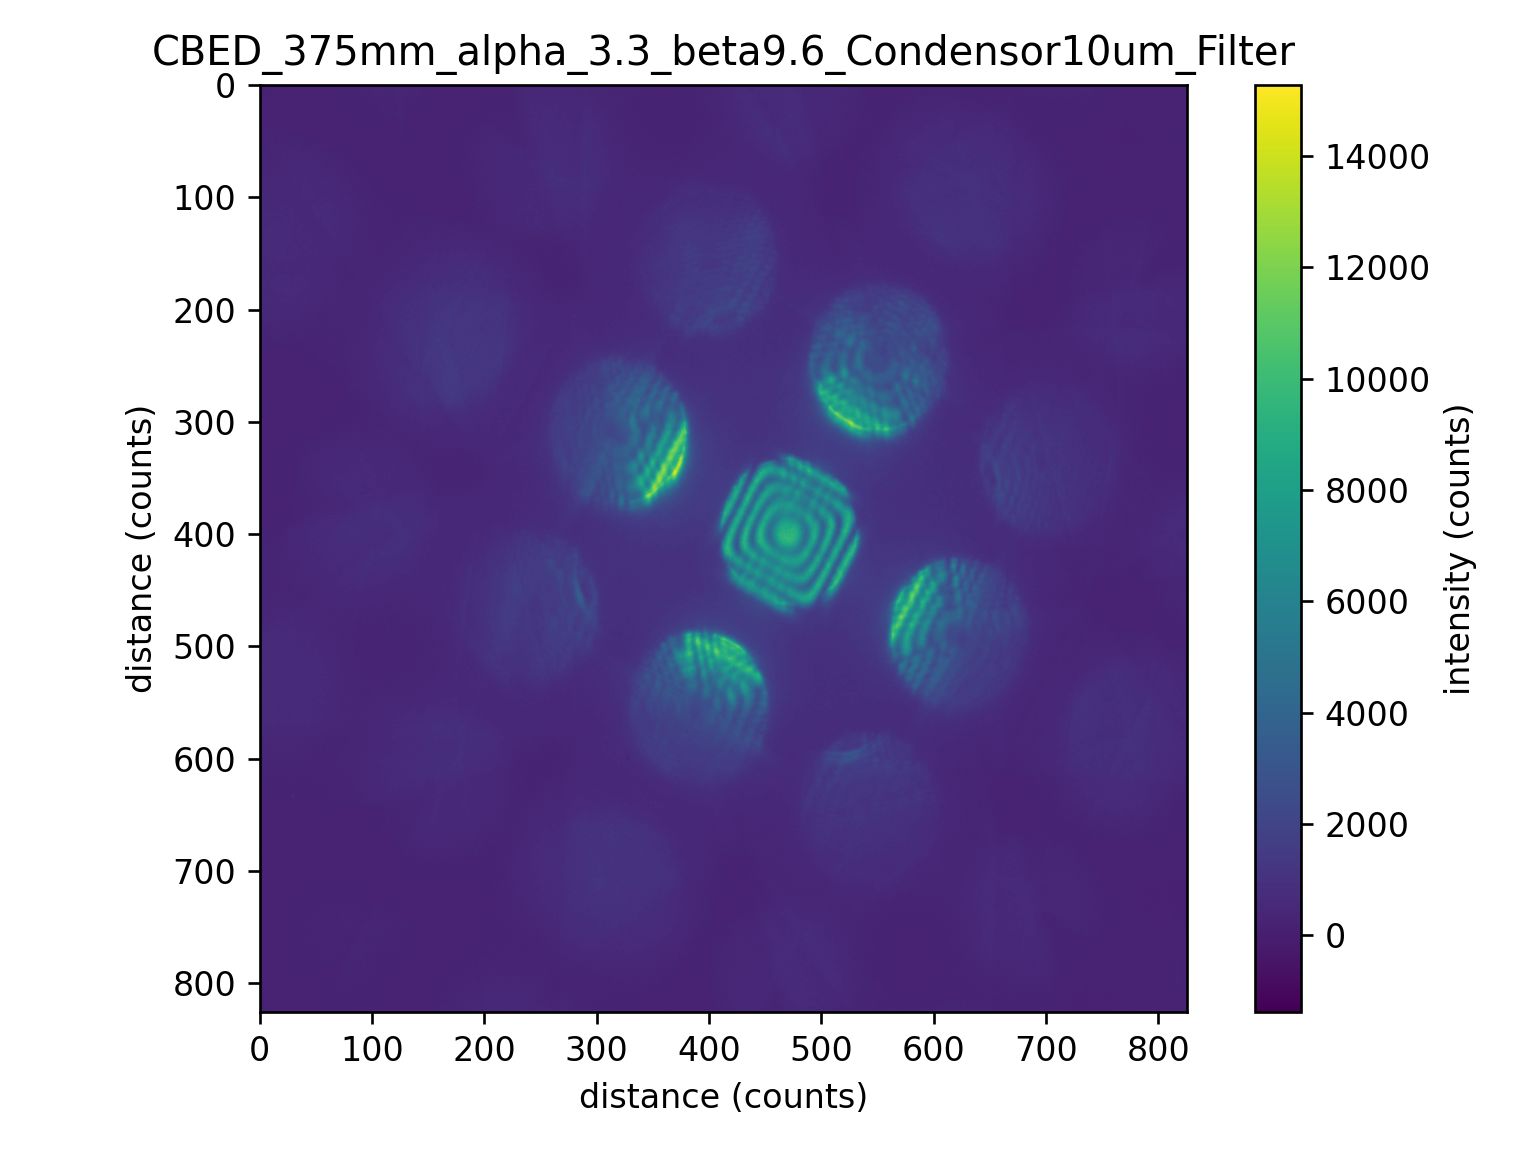

In [6]:
try:
    sidpy_dataset.h5_dataset.file.close()  #close old file if it exists before open a new one
except:
    pass

sidpy_dataset = ft.open_file()
view = sidpy_dataset.plot()

### Determine Angle of Line Profile

Select with a line the angle of the profile you want

<IPython.core.display.Javascript object>


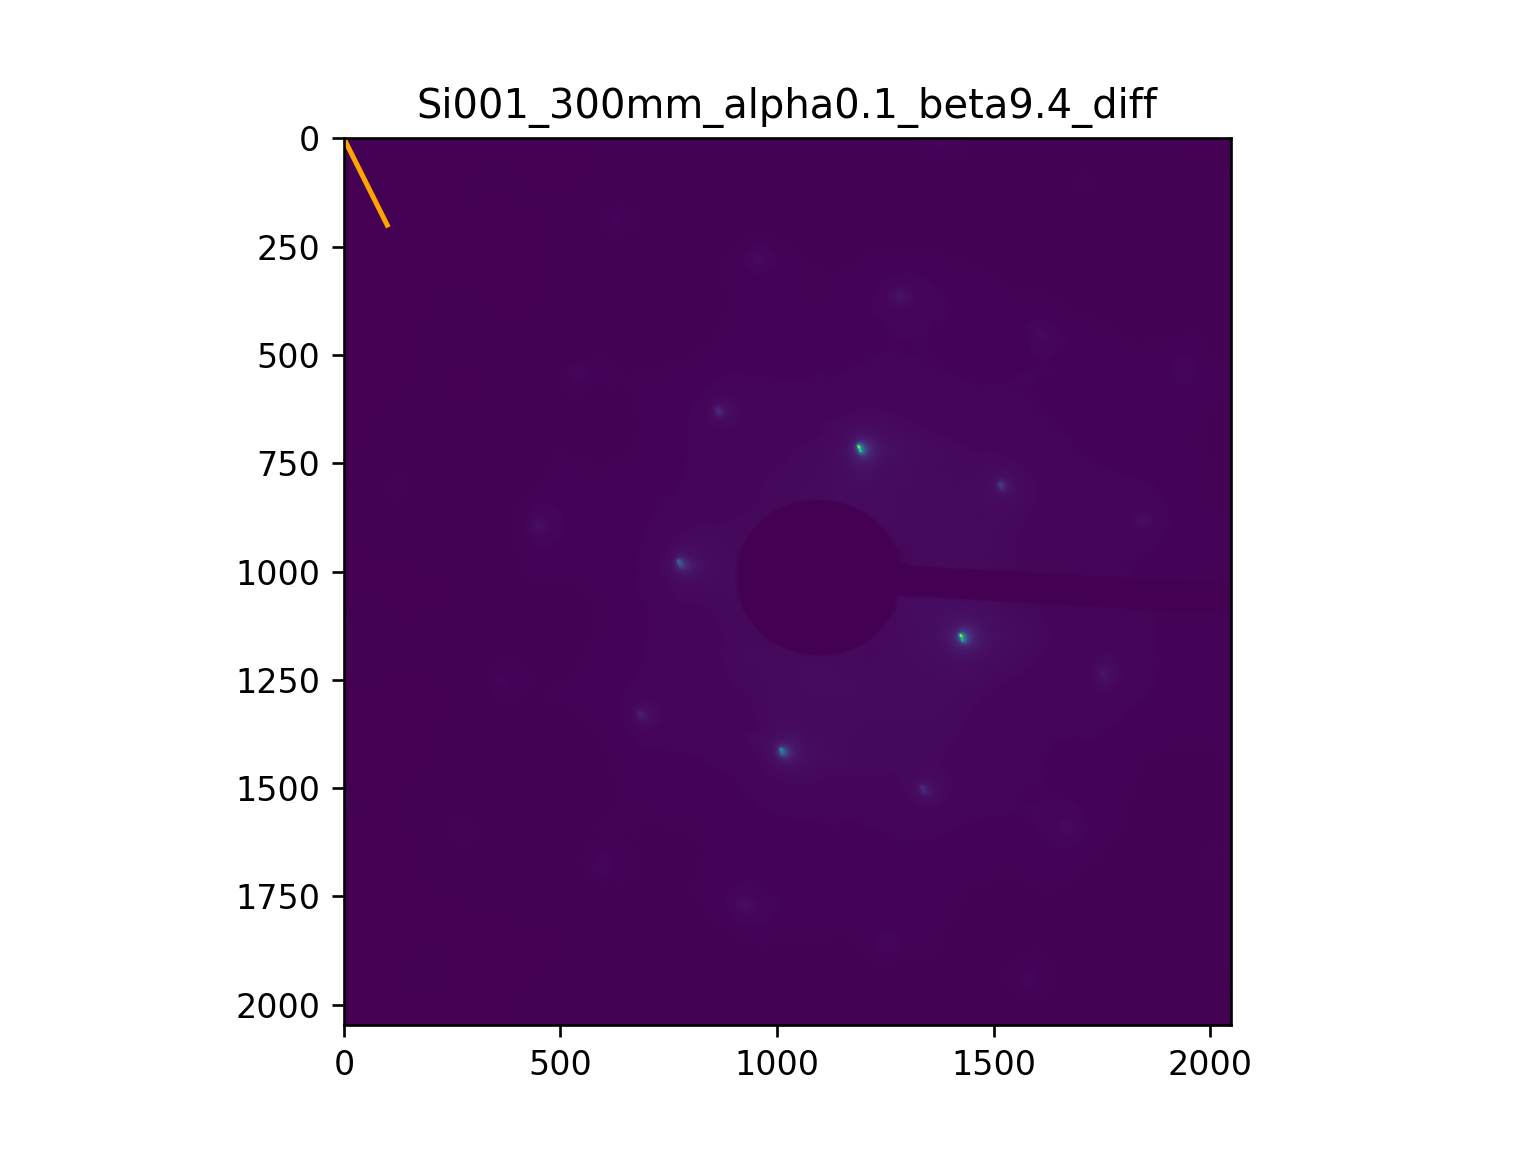

9

In [5]:
fig = plt.figure()

plt.imshow(sidpy_dataset.T)
plt.title(sidpy_dataset.title)
ax = plt.gca()
start_x = 0

fixed_line = False
line = plt.plot([0, 100],[0,200], color = 'orange')


def on_click(event):
   
    if event.inaxes:
        (start_x, end_x), (start_y, end_y) = line[0].get_data()
        start_x = end_x
        start_y = end_y
        end_x = event.xdata
        end_y = event.ydata

        line[0].set_data([start_x, end_x],[start_y, end_y])

        plt.draw()
# mouse_reference = plt.connect('motion_notify_event', on_move)
fig.canvas.mpl_connect('button_press_event', on_click)

In [ ]:
The angle of the profile will be determined here

In [62]:
line_coordinates = np.array(line[0].get_data()).T
vector = line_coordinates[0]-line_coordinates[1]
angle = np.degrees(np.arctan2(vector[1], vector[0]))%180
print(f' The line is {np.linalg.norm(vector):.2f}pixels long')
print(f' The angle is {np.degrees(np.arctan2(vector[1], vector[0]))%180:.2f} degrees')


 The line is 314.72pixels long
 The angle is 116.11 degrees


## Plot totated CBED pattern and select area for profile

<IPython.core.display.Javascript object>


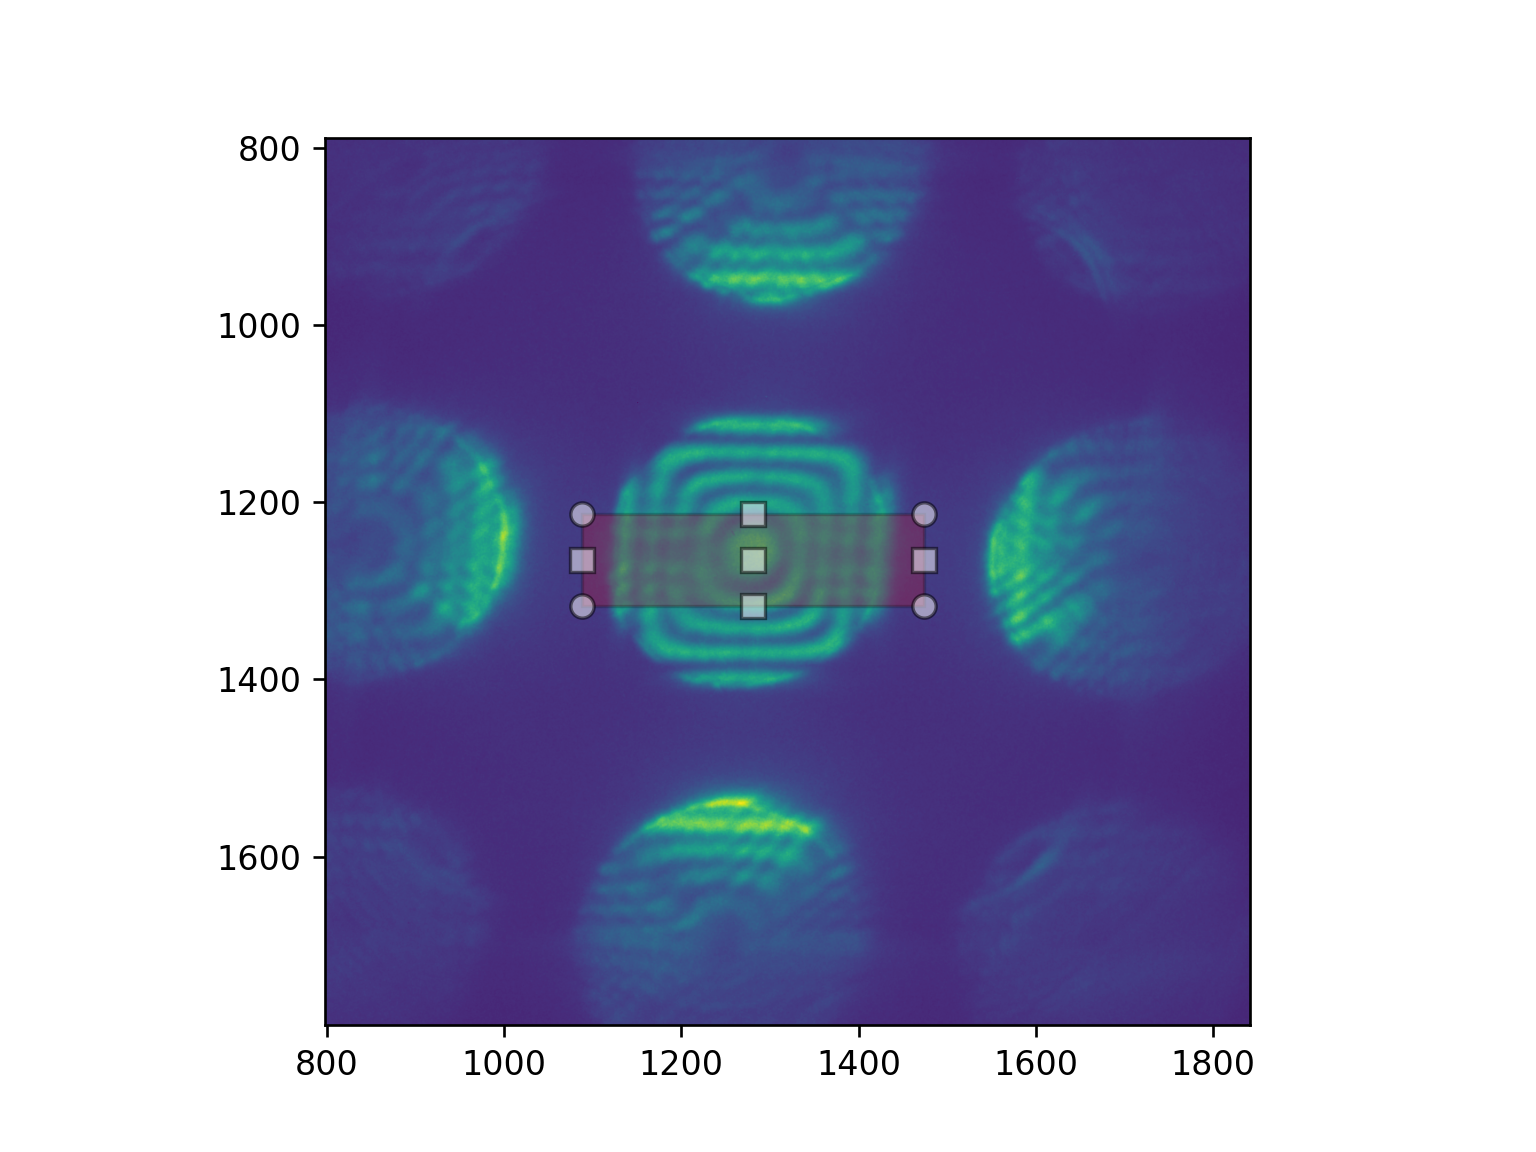

In [65]:
from scipy import misc, ndimage

rotated_cbed = ndimage.rotate(sidpy_dataset.T, angle)

import matplotlib.pyplot as plt
from matplotlib.widgets import  RectangleSelector
plt.figure()
plt.imshow(rotated_cbed)
plt.show()
selector = RectangleSelector(plt.gca(), None,interactive=True , drawtype='box')  # gca get current axis (plot)

selector.to_draw.set_visible(True)


Show selection

<IPython.core.display.Javascript object>


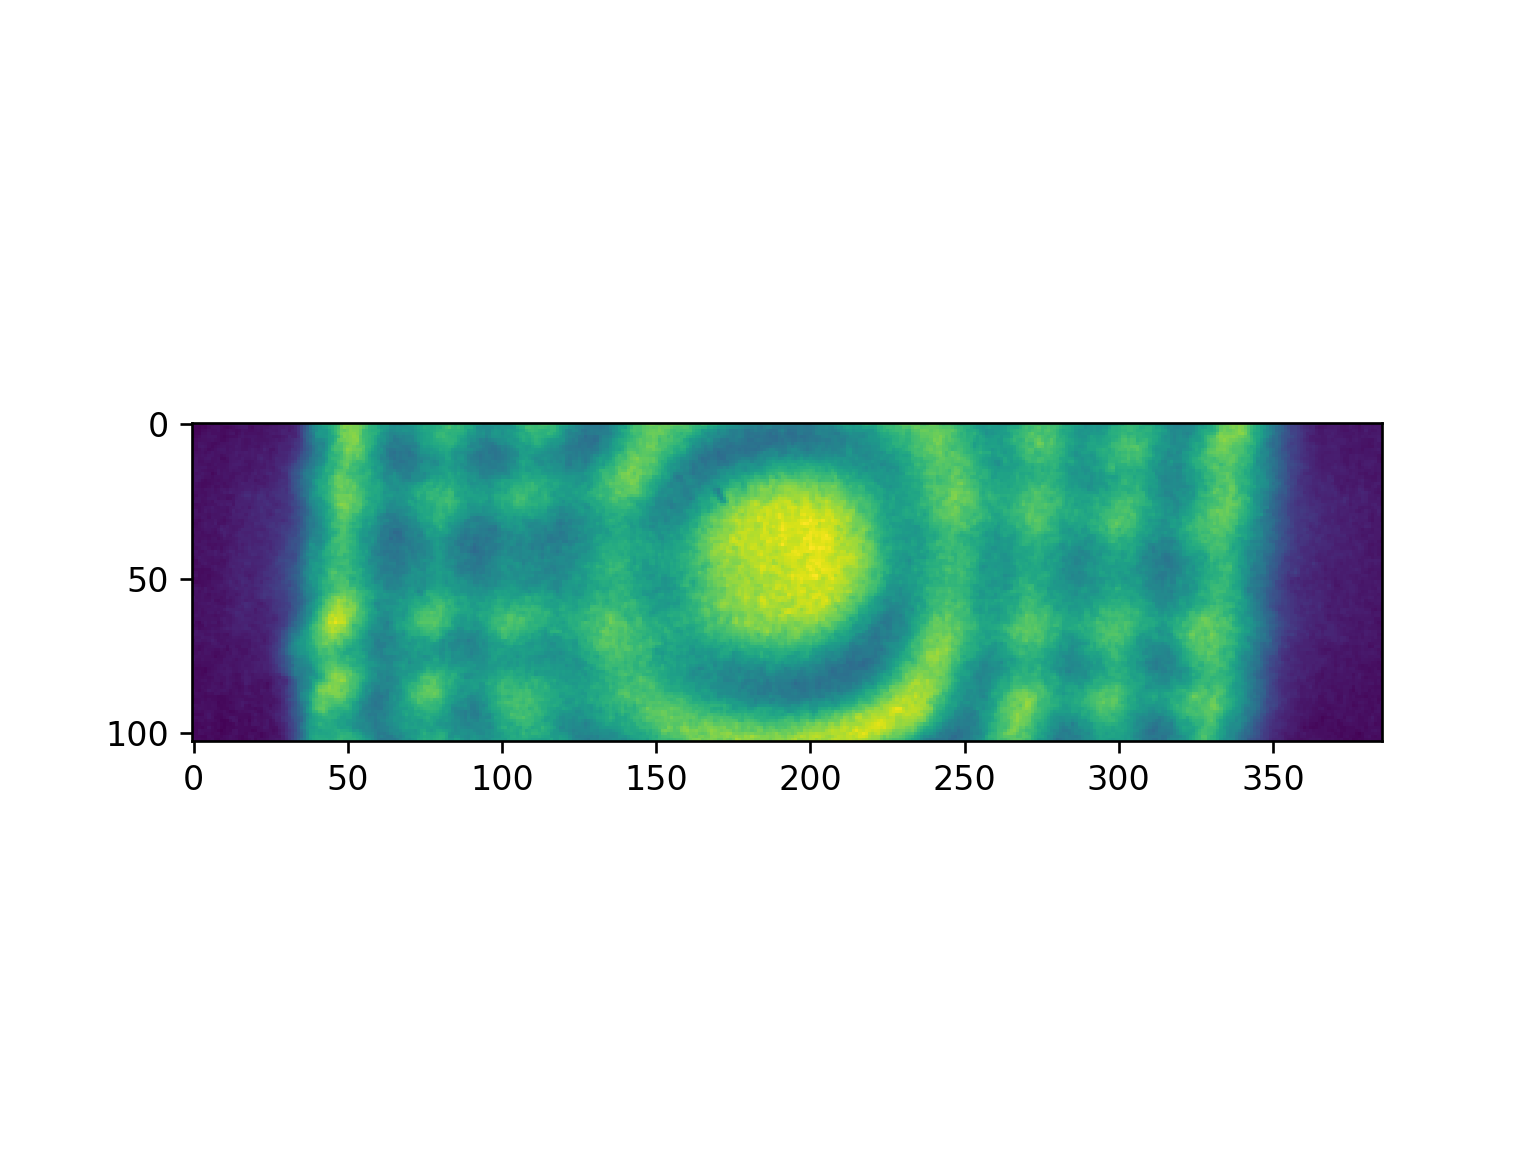

In [69]:
xmin, xmax, ymin, ymax = selector.extents
selection = rotated_cbed[int(ymin):int(ymax), int(xmin):int(xmax)]
plt.figure()
plt.imshow(selection)


## Plot Profile and select to measure distances

In [ ]:
plt.figure()
plt.plot(selection.sum(axis=0))
selector_profile = RectangleSelector(plt.gca(), None,interactive=True , drawtype='box')  # gca get current axis (plot)


Run code cell below to determine distance of selection in profile

In [73]:
xmin, xmax, ymin, ymax = selector_profile.extents
print('distance is' , xmax-xmin , ' pixels' )

distance is 135.75907258064518  pixels


## Homework

> STEP 1: MEASURE THE BRAGG ANGLE
1. Measure the distance of the double Bragg angle in pixel and put this value in a Excel spreadsheet.
2. Enter all the necessary constants: $\lambda$ and the lattice plane distance d
3. Measure the distance of each bright line from the center line and put it in a table in that Excel spread sheet. Use $\theta_i$ and $n$ as column heads.

> STEP 2: CALCULATE THE EXCITATION ERROR

Calculate the excitation error $s_i$ for all minima in the diffracted disk with ¸ $\lambda =$ 2.5 pm and d for the [200] lattice planes according to the following formula:

$$ s_i = \frac{\Delta \theta_i}{2\theta_B \cdot d^2} \cdot \lambda
$$

Do it in a table format.

> STEP 3: DETERMINE THICKNESS AND EXCTINCTION DISTANCE FROM A PLOT

Note that the line must have a negative slope (you will need to increase starting values of $n$ till slope is negative)


## Note
>
> The extinction distance is a unique materials parameter
>